# Ensemble

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [17]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
X_train.shape

(426, 30)

In [4]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

Accuracy on training set: 1.000
Accuracy on test set: 0.881


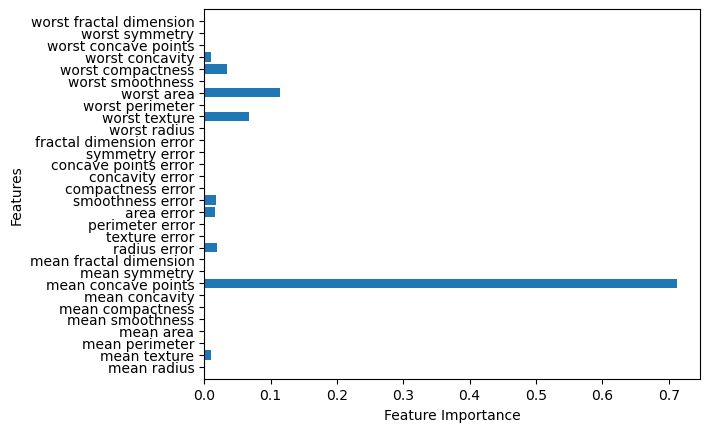

In [5]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

plot_feature_importances_cancer(tree)

Training set accuracy: 1.000
Test set accuracy: 0.972


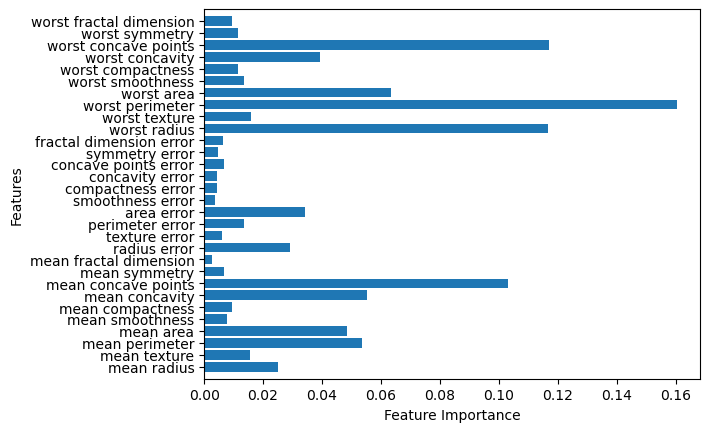

In [6]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Training set accuracy: {:.3f}".format(forest.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(forest.score(X_test, y_test)))

plot_feature_importances_cancer(forest)

Training set accuracy: 1.000
Test set accuracy: 0.986


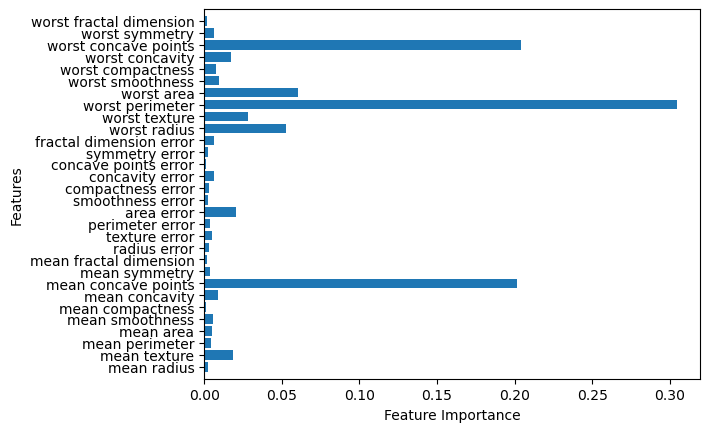

In [7]:
forest = RandomForestClassifier(n_estimators=100, max_features = X_train.shape[1], random_state=0)
forest.fit(X_train, y_train)

print("Training set accuracy: {:.3f}".format(forest.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(forest.score(X_test, y_test)))

plot_feature_importances_cancer(forest)

Training set accuracy: 1.000
Test set accuracy: 0.958


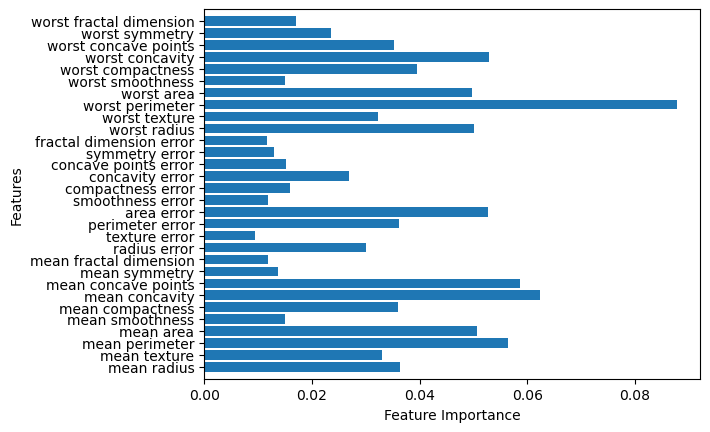

In [8]:
forest = RandomForestClassifier(n_estimators=100, max_features = 1, random_state=0)
forest.fit(X_train, y_train)

print("Training set accuracy: {:.3f}".format(forest.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(forest.score(X_test, y_test)))

plot_feature_importances_cancer(forest)

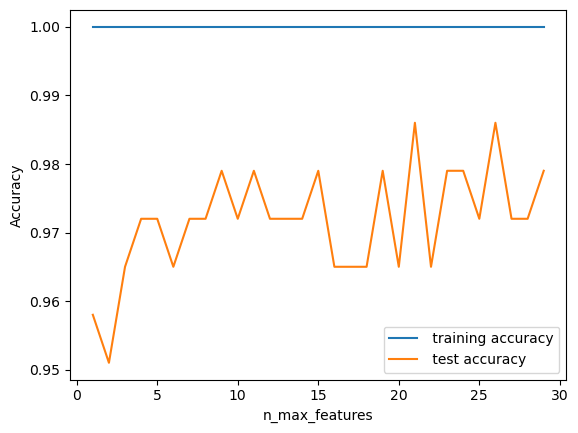

In [9]:
training_accuracy = [] 
test_accuracy = [] 
n_features_settings = range(1, X_train.shape[1])

for n_feature in n_features_settings: # build the model 
    forest = RandomForestClassifier(n_estimators=100, max_features = n_feature, random_state=0)
    forest.fit(X_train, y_train) 
    training_accuracy.append(forest.score(X_train, y_train)) 
    test_accuracy.append(forest.score(X_test, y_test)) 
    
plt.plot(n_features_settings, training_accuracy, label =" training accuracy") 
plt.plot(n_features_settings, test_accuracy, label =" test accuracy") 
plt.ylabel("Accuracy") 
plt.xlabel("n_max_features") 
plt.legend()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Training set accuracy: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(gbrt.score(X_test, y_test)))

Training set accuracy: 1.000
Test set accuracy: 0.965


In [12]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Training set accuracy: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(gbrt.score(X_test, y_test)))

Training set accuracy: 0.991
Test set accuracy: 0.972


In [13]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=3)
gbrt.fit(X_train, y_train)

print("Training set accuracy: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(gbrt.score(X_test, y_test)))

Training set accuracy: 1.000
Test set accuracy: 0.965


In [14]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Training set accuracy: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(gbrt.score(X_test, y_test)))

Training set accuracy: 0.988
Test set accuracy: 0.965


In [15]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=1)
gbrt.fit(X_train, y_train)

print("Training set accuracy: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(gbrt.score(X_test, y_test)))

Training set accuracy: 1.000
Test set accuracy: 0.979


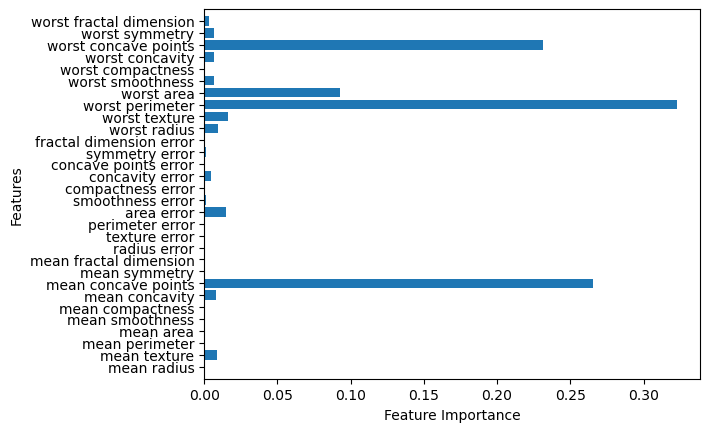

In [16]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

print("Training set accuracy: {:.3f}".format(xgb_model.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(xgb_model.score(X_test, y_test)))

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_model.fit(X_train, y_train)

print("Training set accuracy: {:.3f}".format(xgb_model.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(xgb_model.score(X_test, y_test)))

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=0, max_depth=1)
xgb_model.fit(X_train, y_train)

print("Training set accuracy: {:.3f}".format(xgb_model.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(xgb_model.score(X_test, y_test)))

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=0, learning_rate=0.01)
xgb_model.fit(X_train, y_train)

print("Training set accuracy: {:.3f}".format(xgb_model.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(xgb_model.score(X_test, y_test)))

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=0, max_depth=1, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

print("Training set accuracy: {:.3f}".format(xgb_model.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(xgb_model.score(X_test, y_test)))